In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold , cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import seaborn as sns
import random

In [2]:
image_dir='DMresizedimages'

In [3]:
def process_image(image_dir):
    image = cv2.imread(image_dir, cv2.IMREAD_GRAYSCALE) 
    # Calculate the pixel intensity histogram (vector)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    # Normalize the histogram vector
    hist = hist / hist.sum()
    return hist

References:https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html

In [4]:
X = []  # image vector list
Y = []  # class name

In [5]:
for image_filename in os.listdir(image_dir):
    if image_filename.endswith(".jpg"):
        image_path = os.path.join(image_dir, image_filename)
        class_name = image_filename.split('_')[0]
        # Process the image and get the histogram vector
        hist_vector = process_image(image_path)
        # Append the data to X and Y lists
        Y.append(class_name)
        X.append(hist_vector)


References:1.https://docs.python.org/3/library/os.html#os.listdir 2.https://docs.python.org/3/library/os.path.html#os.path.join 3.https://docs.python.org/3/library/stdtypes.html#str.split

In [6]:
X = np.array(X)
Y = np.array(Y)


In [7]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

References:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [8]:

xtrain,xtest,ytrain,ytest=train_test_split(X,Y_encoded,test_size=0.2,stratify=Y_encoded,random_state=42)

References:https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
k_values= [1, 3, 5, 7, 10, 20]

In [10]:
xtrain = xtrain.reshape(xtrain.shape[0], -1)  
xtest = xtest.reshape(xtest.shape[0],-1)

In [11]:
#standard 5 fold cross validation
standard_traine=[]
standard_vale=[]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)    
    train = []
    val= []
    for train_idx, val_idx in kf.split(xtrain):
        x_train, x_val = xtrain[train_idx], xtrain[val_idx]
        y_train, y_val = ytrain[train_idx], ytrain[val_idx]
        knn.fit(x_train, y_train)
        train_pred = knn.predict(x_train)
        val_pred = knn.predict(x_val)
        train_a = metrics.accuracy_score(y_train, train_pred)
        val_a = metrics.accuracy_score(y_val, val_pred)
        train.append(1 - train_a)  
        val.append(1 - val_a) 
    standard_traine.append(np.mean(train))
    standard_vale.append(np.mean(val))

In [12]:
standard_traine,standard_vale

([0.0,
  0.3677522290967669,
  0.46058628579636984,
  0.4954689568134946,
  0.5185633227650034,
  0.5656672925580489],
 [0.6557411957411958,
  0.6756756756756757,
  0.6267158067158067,
  0.6467158067158068,
  0.6449467649467648,
  0.6395413595413595])

References:https://scikit-learn.org/stable/modules/cross_validation.html

In [13]:
#standard 5 fold cross validation
stratified_traine=[]
stratified_vale=[]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)    
    train = []
    val= []
    for train_idx, val_idx in skf.split(xtrain,ytrain):
        x_train, x_val = xtrain[train_idx], xtrain[val_idx]
        y_train, y_val = ytrain[train_idx], ytrain[val_idx]
        knn.fit(x_train, y_train)
        train_pred = knn.predict(x_train)
        val_pred = knn.predict(x_val)
        train_a = metrics.accuracy_score(y_train, train_pred)
        val_a = metrics.accuracy_score(y_val, val_pred)
        train.append(1 - train_a)  
        val.append(1 - val_a) 
    stratified_traine.append(np.mean(train))
    stratified_vale.append(np.mean(val))

In [14]:
stratified_traine,stratified_vale

([0.0,
  0.36912098172602376,
  0.46151281025230606,
  0.4895927601809955,
  0.5131426929746257,
  0.5643211130606088],
 [0.6449303849303849,
  0.6648812448812448,
  0.6341523341523342,
  0.6268959868959869,
  0.6395413595413596,
  0.6268140868140868])

References:https://scikit-learn.org/stable/modules/cross_validation.html

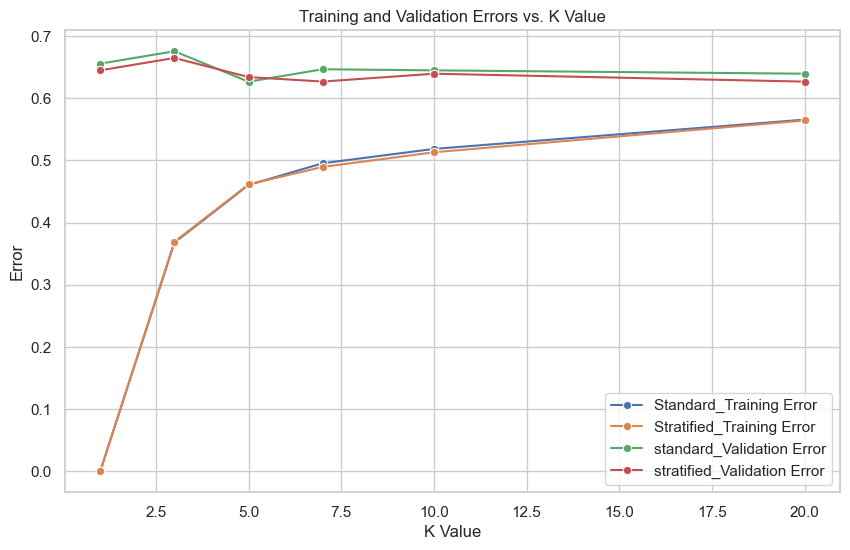

In [15]:
results_df = pd.DataFrame({'k': k_values, 'Training Error': standard_traine, 'Validation Error': standard_vale,'sTraining Error':stratified_traine,'sValidation Error':stratified_vale})
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="k", y="Training Error", data=results_df, marker="o", label="Standard_Training Error")
sns.lineplot(x="k", y="sTraining Error", data=results_df, marker="o", label="Stratified_Training Error")
sns.lineplot(x="k", y="Validation Error", data=results_df, marker="o", label="standard_Validation Error")
sns.lineplot(x="k", y="sValidation Error", data=results_df, marker="o", label="stratified_Validation Error")
plt.title("Training and Validation Errors vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error")
plt.legend()
plt.show()


- At k=1 both standard and stratified training errors are less
- At k=5 standard validation error is less
- At k=20 stratified validation error is less
- When k =1 high complexity when k=20 low complexity and 3,5,7,10 has medium complexity 
- When k=1 model overfits to accomodate every image as 1 category , when k=20 model underfits

References:https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [16]:
#when k=20
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(xtrain,ytrain)
p=knn.predict(xtest)
error=1-metrics.accuracy_score(p,ytest)
print("Test error :"+str(error))

Test error :0.6666666666666667


In [17]:

class_labels=['English foxhound','german short haired pointer','Japanese Spaniel','Norwegian elkhound']

In [18]:
def part5(model):
    for train_idx, val_idx in skf.split(xtrain,ytrain):
        x_train, x_val = xtrain[train_idx], xtrain[val_idx]
        y_train, y_val = ytrain[train_idx], ytrain[val_idx]
        model.fit(x_train, y_train)
        val_pred = model.predict(x_val)
        val_a = metrics.accuracy_score(y_val, val_pred)
    print(f'{model} validation accuracy :'+str(np.mean(val_a)))
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    print("Test_score: "+str((metrics.accuracy_score(ytest,pred))))
    print("F1-score :"+str((np.mean(metrics.f1_score(ytest,pred,average='macro')))))
    cm = metrics.confusion_matrix(ytest, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model}')
    plt.show()

In [19]:
###Nueral_Network
import warnings
warnings.filterwarnings("ignore")

MLPClassifier(hidden_layer_sizes=(10, 10, 10)) validation accuracy :0.4090909090909091
Test_score: 0.2753623188405797
F1-score :0.22863636363636364


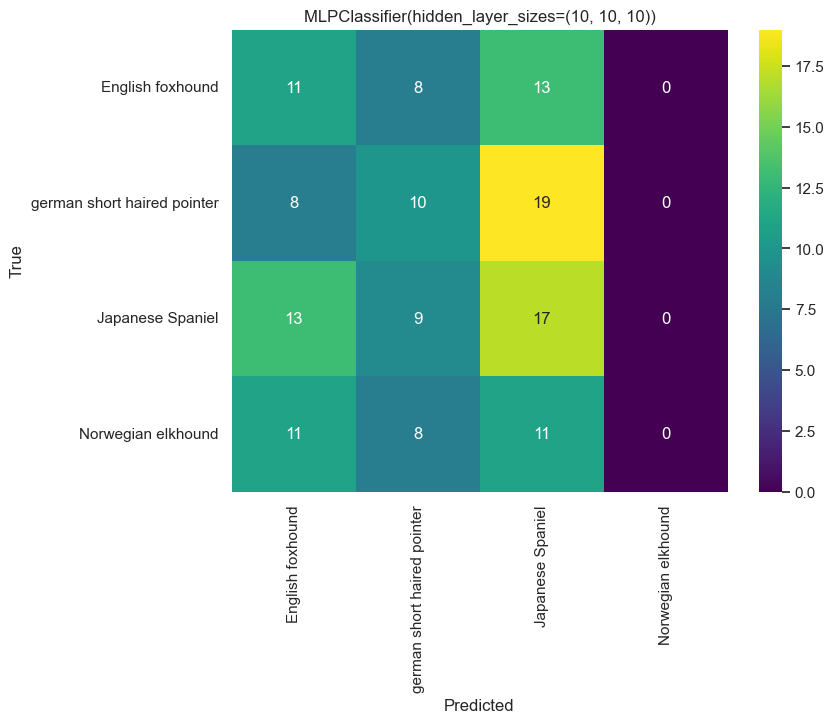

In [21]:
nn=MLPClassifier(hidden_layer_sizes=(10,10,10))
part5(nn)

References:1.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
           2.https://seaborn.pydata.org/generated/seaborn.heatmap.html

AdaBoostClassifier() validation accuracy :0.35454545454545455
Test_score: 0.38405797101449274
F1-score :0.3796156311216552


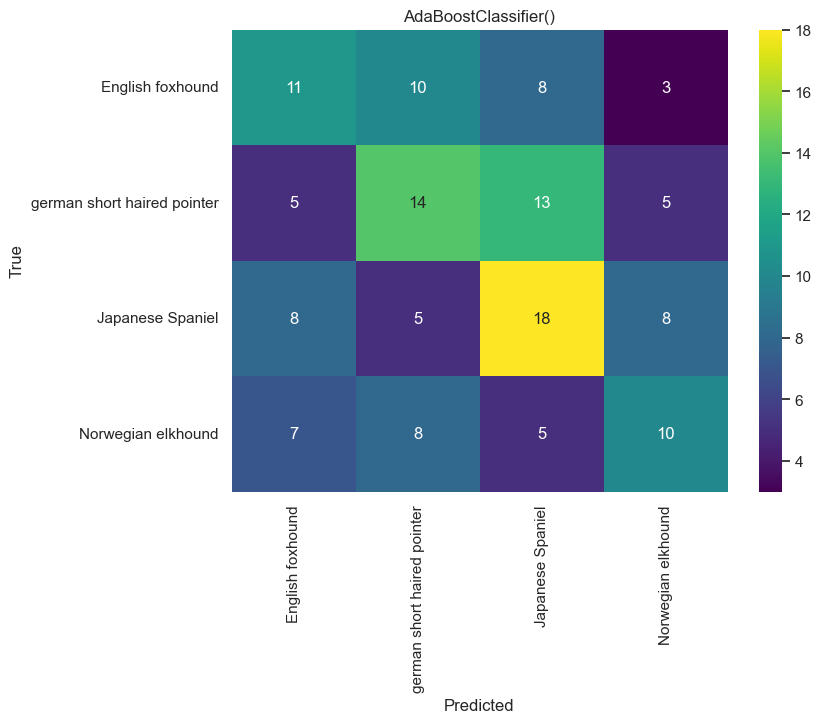

In [22]:
#Adaboost
ada=AdaBoostClassifier()
part5(ada)

References:1.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
           2.https://seaborn.pydata.org/generated/seaborn.heatmap.html

DecisionTreeClassifier(max_depth=10) validation accuracy :0.33636363636363636
Test_score: 0.39855072463768115
F1-score :0.3935638795515268


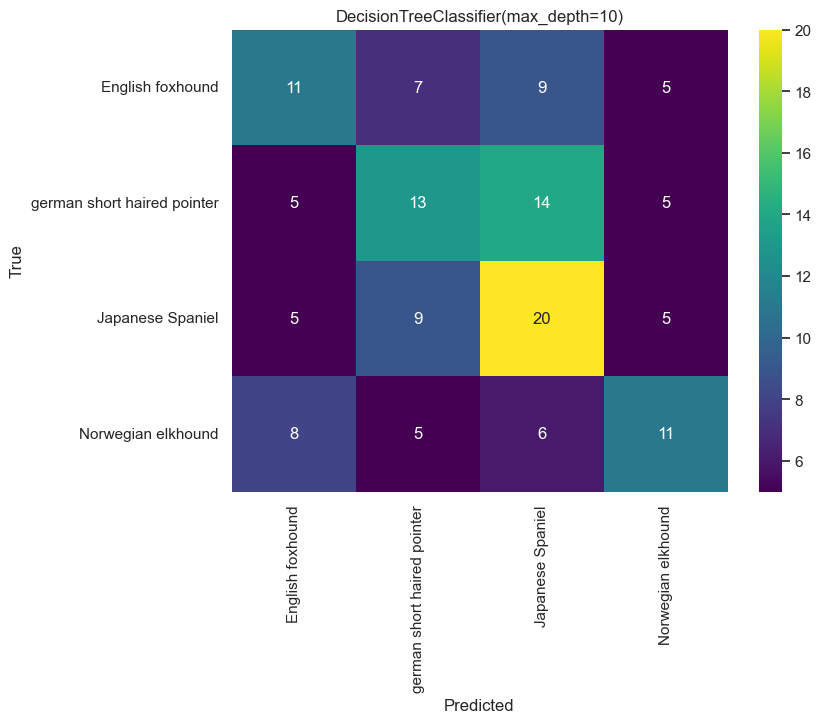

In [23]:
#Decision Tree
dt=DecisionTreeClassifier(max_depth=10)
part5(dt)

- Based on **confusion matrices** DecisionTree performs well to classify different classes correctly than other classifiers.
- Based on **Validation accuracies** MLPclassifier has highest(best) with **40%**
- Based on **Test Accuraries** DecisionTree has highest(best) with **39%**
- Based on **F-measures** DecisionTree has highest(best) with **39%**

References:1.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
           2.https://seaborn.pydata.org/generated/seaborn.heatmap.html